### Importing Necessary Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil # Exporting Root Directory

### Creating Root Directory

In [32]:
# Defining directories
candidate_name = 'Aniruddha_Ojha'
root_dir = f'ds_{candidate_name}'
csv_dir = f'{root_dir}/csv_files'
output_dir = f'{root_dir}/outputs'

# Creating all required directories
os.makedirs(csv_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

print(f"Root directory created: {root_dir}")
print(f"CSV directory created: {csv_dir}")
print(f"Output directory created: {output_dir}")

Root directory created: ds_Aniruddha_Ojha
CSV directory created: ds_Aniruddha_Ojha/csv_files
Output directory created: ds_Aniruddha_Ojha/outputs


### Loading the Datasets

In [33]:
#Loading datasets using Pandas
df_sentiment = pd.read_csv('fear_greed_index.csv')
df_historical = pd.read_csv('historical_data.csv')

In [34]:
df_sentiment.to_csv(os.path.join(csv_dir, 'fear_greed_index.csv'), index=False)
df_historical.to_csv(os.path.join(csv_dir, 'historical_data.csv'), index=False)
print(f"Datasets saved to {csv_dir}")

Datasets saved to ds_Aniruddha_Ojha/csv_files


In [35]:
df_sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


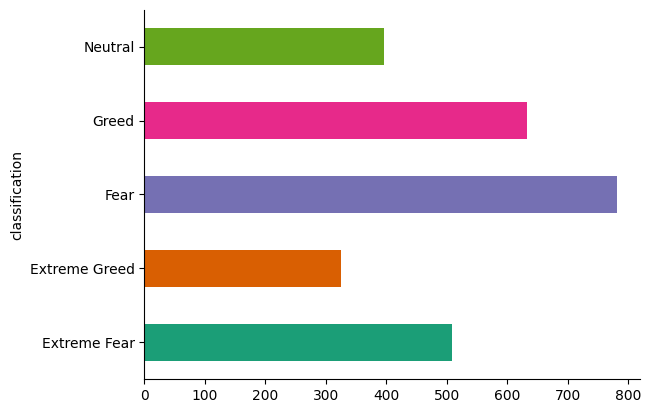

In [36]:
# Visualizing Classification in Market Sentiment
df_sentiment.groupby('classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [37]:
df_historical.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [38]:
# Checking for duplicate columns
df_sentiment.drop_duplicates(subset=['date'], inplace=True)
df_historical.drop_duplicates(inplace=True)

# Forward filling missing sentiment values
df_sentiment.ffill(inplace=True)
df_historical.ffill(inplace=True)

In [39]:
# Checking for Null Values
df_sentiment.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [40]:
df_historical.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


### 1. Data Preprocessing

**Converting date columns to datetime objects**

In [41]:
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])

# Changing format to day-month-year format, as our strptime format is currently expecting month-day-year.
df_historical['Timestamp IST'] = pd.to_datetime(df_historical['Timestamp IST'],format='%d-%m-%Y %H:%M')

Converting the date column in the sentiment dataset and the Timestamp IST column in the historical data to a standardized datetime format.

**Standardizing column names**

In [42]:
df_historical.rename(columns={'Time': 'timestamp IST', 'Closed PnL': 'closed_pnl', 'Start Position': 'start_position'}, inplace=True)

**Creating a common date key for merging**

In [43]:
df_historical['trade_date'] = df_historical['Timestamp IST'].dt.date
df_sentiment['date_only'] = df_sentiment['date'].dt.date

For the historical data, creating a new 'trade_date' column by extracting just the date from the Timestamp IST column. It is necessary for joining with the daily sentiment data.

**Merging the two datasets**

In [44]:
merged_df = pd.merge(df_historical, df_sentiment, left_on='trade_date', right_on='date_only', how='left')
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,start_position,Direction,closed_pnl,...,Crossed,Fee,Trade ID,Timestamp,trade_date,timestamp,value,classification,date,date_only
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02,2024-12-02


- Performing a **left merge** of the historical trader data with the sentiment data using the trade_date column as the key.
- This will add the value and classification columns to each individual trade record, allowing you to analyze trader behavior within specific sentiment regimes.

**Saving the merged dataframe as an intermediate output**

In [45]:
merged_df.to_csv(os.path.join(csv_dir, 'merged_data.csv'), index=False)
print(f"Merged data saved to {csv_dir}/merged_data.csv")

Merged data saved to ds_Aniruddha_Ojha/csv_files/merged_data.csv


### 2. Analyzing Trader Performance by Sentiment Regime

- This step focuses on calculating and comparing key performance indicators (KPIs) for all trades that occurred under different market sentiment conditions.



In [47]:
# Grouping performance by sentiment regime
sentiment_performance = merged_df.groupby('classification').agg(
    Average_PnL=('closed_pnl', 'mean'),
    Win_Rate_percent=('closed_pnl', lambda x: (x > 0).mean() * 100),
    Total_Trades=('closed_pnl', 'count'),
    Unique_Days=('trade_date', 'nunique')
).sort_values(by='Total_Trades', ascending=False)
print("\nTrader Performance by Sentiment Regime:")
print(sentiment_performance)


Trader Performance by Sentiment Regime:
                Average_PnL  Win_Rate_percent  Total_Trades  Unique_Days
classification                                                          
Fear              54.290400         42.076750         61837           91
Greed             42.743559         38.482794         50303          193
Extreme Greed     67.892861         46.494299         39992          114
Neutral           34.307718         39.699093         37686           67
Extreme Fear      34.537862         37.060748         21400           14


In [48]:
# Calculating Trading Frequency per sentiment regime
sentiment_performance['Trading_Frequency_Per_Day'] = sentiment_performance['Total_Trades'] / sentiment_performance['Unique_Days']
print("\nTrader Performance Metrics by Sentiment Regime:")
print(sentiment_performance[['Average_PnL', 'Win_Rate_percent', 'Trading_Frequency_Per_Day']])
print("\n")


Trader Performance Metrics by Sentiment Regime:
                Average_PnL  Win_Rate_percent  Trading_Frequency_Per_Day
classification                                                          
Fear              54.290400         42.076750                 679.527473
Greed             42.743559         38.482794                 260.637306
Extreme Greed     67.892861         46.494299                 350.807018
Neutral           34.307718         39.699093                 562.477612
Extreme Fear      34.537862         37.060748                1528.571429




**Visualizing and Saving Plots**

Bar charts saved to ds_Aniruddha_Ojha/outputs/sentiment_performance_bars.png


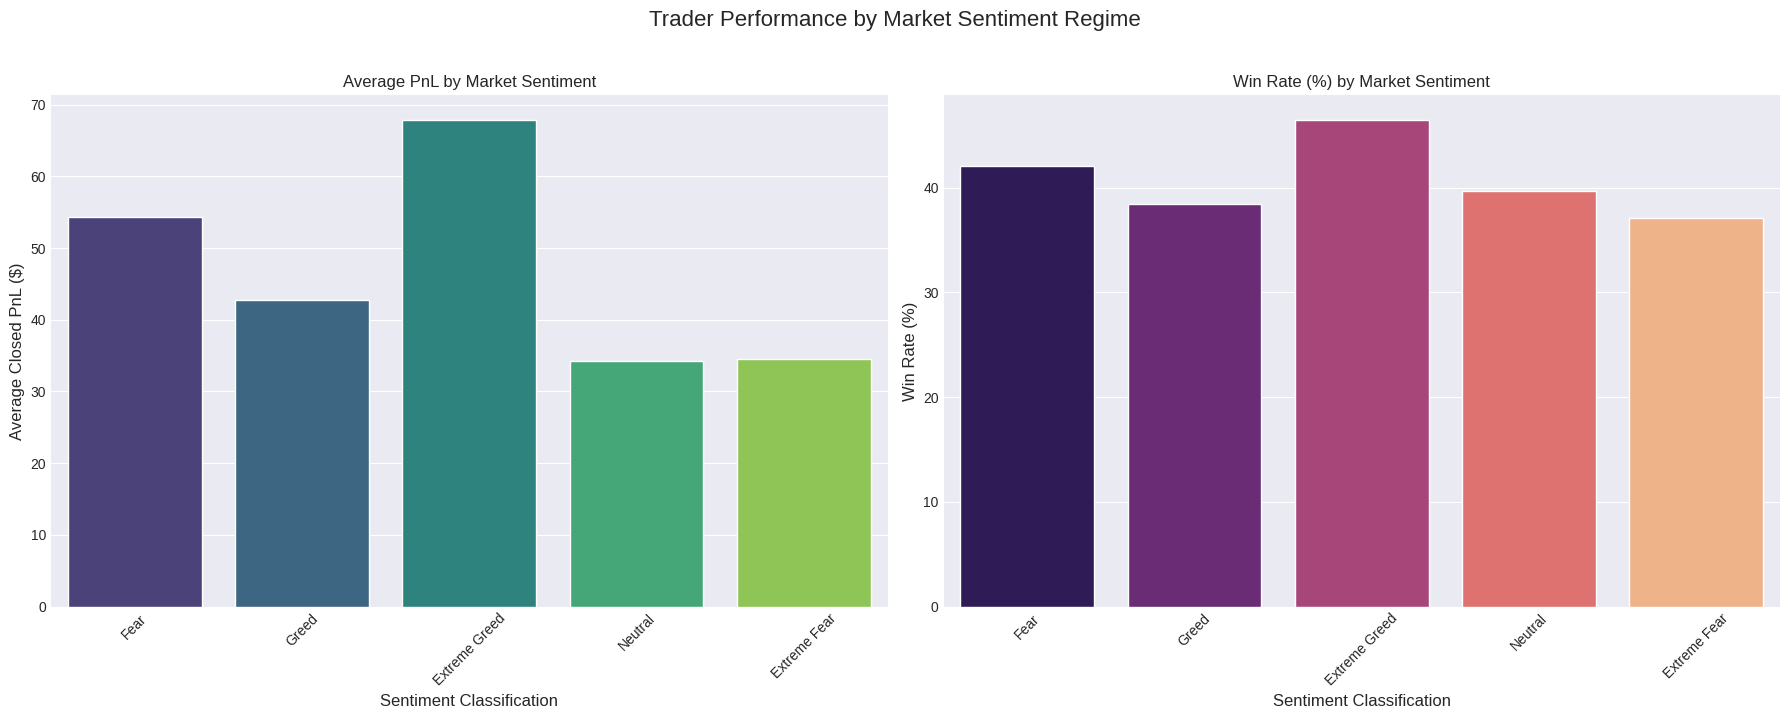

In [49]:
# Setting a consistent style for the plots
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Trader Performance by Market Sentiment Regime', fontsize=16, y=1.02)

# Bar chart for Average PnL (Fix applied here)
sns.barplot(x=sentiment_performance.index, y='Average_PnL', data=sentiment_performance, hue=sentiment_performance.index, palette='viridis', ax=axes[0], legend=False)
axes[0].set_title('Average PnL by Market Sentiment')
axes[0].set_xlabel('Sentiment Classification', fontsize=12)
axes[0].set_ylabel('Average Closed PnL ($)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Bar chart for Win Rate (Fix applied here)
sns.barplot(x=sentiment_performance.index, y='Win_Rate_percent', data=sentiment_performance, hue=sentiment_performance.index, palette='magma', ax=axes[1], legend=False)
axes[1].set_title('Win Rate (%) by Market Sentiment')
axes[1].set_xlabel('Sentiment Classification', fontsize=12)
axes[1].set_ylabel('Win Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Saving the figure to the outputs directory
plot_filename = os.path.join(output_dir, 'sentiment_performance_bars.png')
plt.savefig(plot_filename)
print(f"Bar charts saved to {plot_filename}")

plt.show()

### 3. Identifying Contrarian and Consistent Traders
- A deeper look at individual trader performance to find those who thrive in specific conditions or show consistent success.



In [50]:
# Firstly, we'll calculate performance metrics for each trader in each sentiment regime
trader_sentiment_performance = merged_df.groupby(['Account', 'classification']).agg(
    Avg_PnL=('closed_pnl', 'mean'),
    Win_Rate=('closed_pnl', lambda x: (x > 0).mean() * 100),
    Total_Trades=('closed_pnl', 'count')
).reset_index()

In [51]:
# Identifying Contrarian Traders (most profitable during 'Fear' or 'Extreme Fear')
fear_regimes = ['Fear', 'Extreme Fear']
contrarian_traders_df = trader_sentiment_performance[
    trader_sentiment_performance['classification'].isin(fear_regimes)
]
top_contrarians = contrarian_traders_df.sort_values(by='Avg_PnL', ascending=False).head(10)

print("\nTop 10 Contrarian Traders (Highest Average PnL in 'Fear' and 'Extreme Fear' Regimes):")
print(top_contrarians[['Account', 'classification', 'Avg_PnL', 'Win_Rate']])
print("\n")


Top 10 Contrarian Traders (Highest Average PnL in 'Fear' and 'Extreme Fear' Regimes):
                                        Account classification      Avg_PnL  \
0    0x083384f897ee0f19899168e3b1bec365f52a9012   Extreme Fear  1247.692214   
42   0x420ab45e0bd8863569a5efbb9c05d91f40624641           Fear  1016.819167   
80   0x72c6a4624e1dffa724e6d00d64ceae698af892a0   Extreme Fear   900.002541   
2    0x083384f897ee0f19899168e3b1bec365f52a9012           Fear   626.194346   
82   0x72c6a4624e1dffa724e6d00d64ceae698af892a0           Fear   335.300103   
57   0x4acb90e786d897ecffb614dc822eb231b4ffb9f4           Fear   212.594357   
148  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3           Fear   200.506120   
60   0x4f93fead39b70a1824f981a54d4e55b278e9f760   Extreme Fear   200.395004   
55   0x4acb90e786d897ecffb614dc822eb231b4ffb9f4   Extreme Fear   169.063285   
40   0x420ab45e0bd8863569a5efbb9c05d91f40624641   Extreme Fear   155.099710   

      Win_Rate  
0    37.000000  
42   35.7

In [52]:
# Identifying Greed Performers (most profitable during 'Greed' or 'Extreme Greed')
greed_regimes = ['Greed', 'Extreme Greed']
greed_traders_df = trader_sentiment_performance[
    trader_sentiment_performance['classification'].isin(greed_regimes)
]
top_greed_performers = greed_traders_df.sort_values(by='Avg_PnL', ascending=False).head(10)

print("Top 10 'Greed' Performers (Highest Average PnL in 'Greed' and 'Extreme Greed' Regimes):")
print(top_greed_performers[['Account', 'classification', 'Avg_PnL', 'Win_Rate']])
print("\n")

Top 10 'Greed' Performers (Highest Average PnL in 'Greed' and 'Extreme Greed' Regimes):
                                        Account classification      Avg_PnL  \
46   0x430f09841d65beb3f27765503d0f850b8bce7713  Extreme Greed  8285.663252   
78   0x72743ae2822edd658c0c50608fd7c5c501b2afbd          Greed   764.916220   
135  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  Extreme Greed   672.735763   
3    0x083384f897ee0f19899168e3b1bec365f52a9012          Greed   482.089321   
71   0x6d6a4b953f202f8df5bed40692e7fd865318264a  Extreme Greed   428.023843   
91   0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f  Extreme Greed   420.277529   
123  0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0          Greed   408.979729   
11   0x271b280974205ca63b716753467d5a371de622ab  Extreme Greed   358.632043   
48   0x430f09841d65beb3f27765503d0f850b8bce7713          Greed   294.922917   
128  0xae5eacaf9c6b9111fd53034a602c192a04e082ed          Greed   224.519734   

       Win_Rate  
46   100.000000  
78    

In [53]:
# Identifying Consistent Performers (positive performance across all sentiment types)

# Finding traders who have traded in at least 3 distinct sentiment regimes
min_regimes = 3
consistent_traders_df = trader_sentiment_performance.groupby('Account').filter(lambda x: x['classification'].nunique() >= min_regimes)

# Calculating the mean performance across all regimes for these traders
consistent_trader_summary = consistent_traders_df.groupby('Account').agg(
    Overall_Avg_PnL=('Avg_PnL', 'mean'),
    Overall_Win_Rate=('Win_Rate', 'mean'),
    Total_Regimes_Traded=('classification', 'nunique')
).sort_values(by='Overall_Avg_PnL', ascending=False)

print(f"Top 10 Consistent Performers (Traded in >= {min_regimes} regimes, sorted by overall average PnL):")
print(consistent_trader_summary.head(10))

Top 10 Consistent Performers (Traded in >= 3 regimes, sorted by overall average PnL):
                                            Overall_Avg_PnL  Overall_Win_Rate  \
Account                                                                         
0x430f09841d65beb3f27765503d0f850b8bce7713      1808.857734         44.920684   
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6       882.266368         59.783704   
0x420ab45e0bd8863569a5efbb9c05d91f40624641       586.922533         23.760995   
0x083384f897ee0f19899168e3b1bec365f52a9012       522.361081         34.106547   
0x72c6a4624e1dffa724e6d00d64ceae698af892a0       240.321147         23.863644   
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23       184.685716         35.993804   
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4       146.845384         48.524175   
0x72743ae2822edd658c0c50608fd7c5c501b2afbd       128.894559         21.815407   
0x6d6a4b953f202f8df5bed40692e7fd865318264a       118.780821         46.115162   
0xae5eacaf9c6b9111fd530

### 4. Correlating Sentiment Indicators with Trading Outcomes

- To detect correlations, you need to aggregate trading outcomes to the same daily level as the sentiment data.

In [54]:
# Aggregating trading data to a daily level
daily_performance = merged_df.groupby('trade_date').agg(
    Daily_PnL=('closed_pnl', 'sum'),
    Daily_Win_Rate_percent=('closed_pnl', lambda x: (x > 0).mean() * 100),
    Trade_Count=('closed_pnl', 'count')
).reset_index()

# Merging daily performance with the daily sentiment index value
daily_analysis_df = pd.merge(daily_performance, df_sentiment[['date_only', 'value']], left_on='trade_date', right_on='date_only', how='left')

# Calculating the correlation matrix
correlation_matrix = daily_analysis_df[['value', 'Daily_PnL', 'Daily_Win_Rate_percent', 'Trade_Count']].corr()

print("\nCorrelation Matrix of Sentiment Value and Daily Trading Outcomes:")
print(correlation_matrix)
print("\n")




Correlation Matrix of Sentiment Value and Daily Trading Outcomes:
                           value  Daily_PnL  Daily_Win_Rate_percent  \
value                   1.000000  -0.082642                0.152485   
Daily_PnL              -0.082642   1.000000                0.170511   
Daily_Win_Rate_percent  0.152485   0.170511                1.000000   
Trade_Count            -0.245241   0.360083                0.092548   

                        Trade_Count  
value                     -0.245241  
Daily_PnL                  0.360083  
Daily_Win_Rate_percent     0.092548  
Trade_Count                1.000000  




Correlation heatmap saved to ds_Aniruddha_Ojha/outputs/correlation_heatmap.png


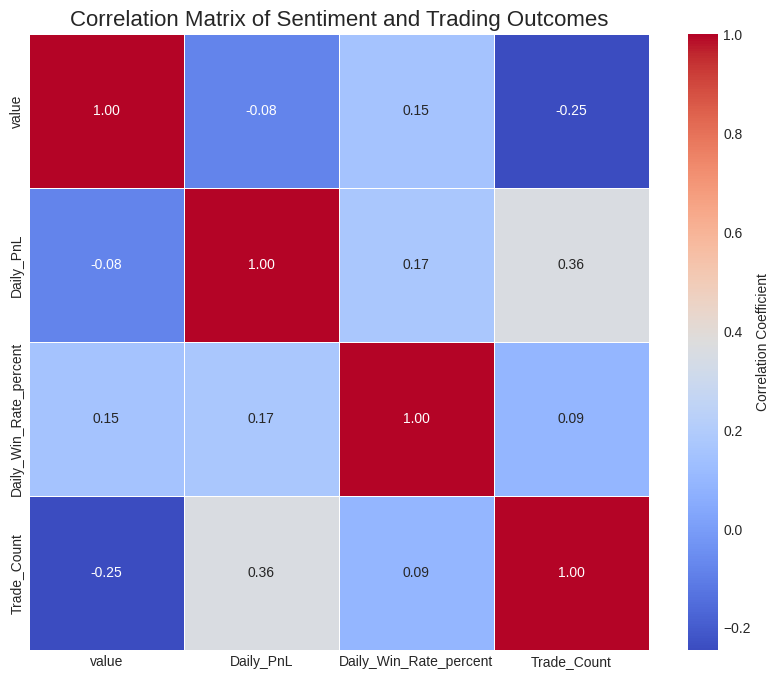

In [55]:
# Visualizing the correlation with a heatmap
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Sentiment and Trading Outcomes', fontsize=16)

# Saving the heatmap
plot_filename = os.path.join(output_dir, 'correlation_heatmap.png')
plt.savefig(plot_filename)
print(f"Correlation heatmap saved to {plot_filename}")

plt.show()

Scatter plot saved to ds_Aniruddha_Ojha/outputs/pnl_vs_sentiment_scatter.png


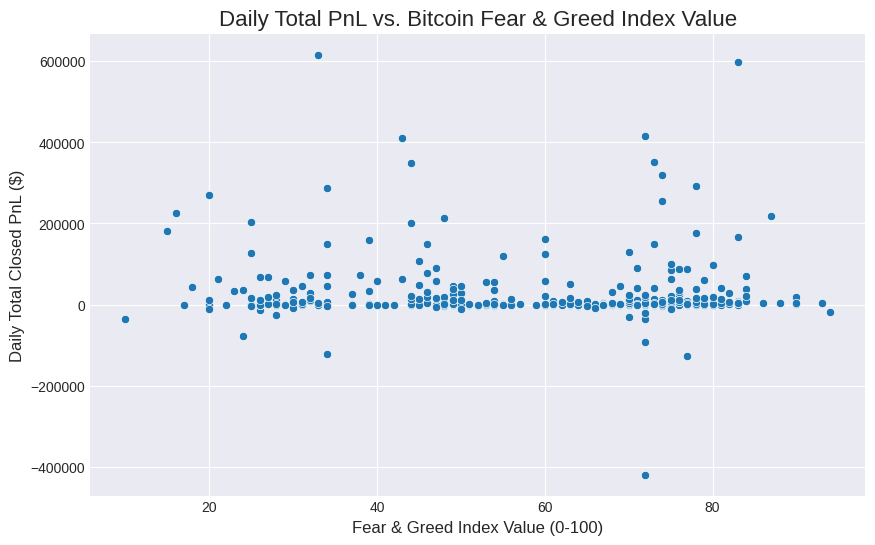

In [56]:
# Visualizing the relationship with a scatter plot.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value', y='Daily_PnL', data=daily_analysis_df)
plt.title('Daily Total PnL vs. Bitcoin Fear & Greed Index Value', fontsize=16)
plt.xlabel('Fear & Greed Index Value (0-100)', fontsize=12)
plt.ylabel('Daily Total Closed PnL ($)', fontsize=12)
plt.grid(True)

# Save the scatter plot
plot_filename_scatter = os.path.join(output_dir, 'pnl_vs_sentiment_scatter.png')
plt.savefig(plot_filename_scatter)
print(f"Scatter plot saved to {plot_filename_scatter}")

plt.show()

### 5. Generating Ranked Trader Lists

In [57]:
# Calculating overall performance metrics for each trader
overall_trader_performance = merged_df.groupby('Account').agg(
    Total_PnL=('closed_pnl', 'sum'),
    Overall_Win_Rate=('closed_pnl', lambda x: (x > 0).mean() * 100),
    Total_Trades=('closed_pnl', 'count')
).sort_values(by='Total_PnL', ascending=False)

# Calculating Gross Profit and Gross Loss for Profit Factor
overall_trader_performance['Gross_Profit'] = merged_df[merged_df['closed_pnl'] > 0].groupby('Account')['closed_pnl'].sum()
overall_trader_performance['Gross_Loss'] = merged_df[merged_df['closed_pnl'] < 0].groupby('Account')['closed_pnl'].sum().abs()

# Calculating Profit Factor, We handle cases with no losses to avoid division by zero
overall_trader_performance['Profit_Factor'] = np.where(
    overall_trader_performance['Gross_Loss'] == 0,
    overall_trader_performance['Gross_Profit'],  # If no losses, Profit Factor is Gross Profit
    overall_trader_performance['Gross_Profit'] / overall_trader_performance['Gross_Loss']
)
overall_trader_performance = overall_trader_performance.fillna(0) # Fill NaNs for traders with no profits

In [58]:
# A. Ranking traders by Best Overall PnL
print("\nTop 10 Traders by Best Overall PnL:")
print(overall_trader_performance[['Total_PnL', 'Overall_Win_Rate']].head(10))
print("\n")


Top 10 Traders by Best Overall PnL:
                                               Total_PnL  Overall_Win_Rate
Account                                                                   
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  2.143383e+06         33.713432
0x083384f897ee0f19899168e3b1bec365f52a9012  1.600230e+06         35.961236
0xbaaaf6571ab7d571043ff1e313a9609a10637864  9.401638e+05         46.758211
0x513b8629fe877bb581bf244e326a047b249c4ff1  8.404226e+05         40.119320
0xbee1707d6b44d4d52bfe19e41f8a828645437aab  8.360806e+05         42.823014
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  6.777471e+05         48.622590
0x72743ae2822edd658c0c50608fd7c5c501b2afbd  4.293556e+05         34.591195
0x430f09841d65beb3f27765503d0f850b8bce7713  4.165419e+05         48.423605
0x72c6a4624e1dffa724e6d00d64ceae698af892a0  4.030115e+05         30.629371
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  3.790954e+05         81.087638




In [59]:
# B. Rank traders by Highest Overall Win Rate
print("Top 10 Traders by Highest Overall Win Rate:")
print(overall_trader_performance.sort_values(by='Overall_Win_Rate', ascending=False)[['Overall_Win_Rate', 'Total_PnL']].head(10))
print("\n")


Top 10 Traders by Highest Overall Win Rate:
                                            Overall_Win_Rate      Total_PnL
Account                                                                    
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4         81.087638  379095.406711
0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0         57.314149   72846.484272
0x2c229d22b100a7beb69122eed721cee9b24011dd         51.991355  168658.004994
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4         48.622590  677747.050643
0x430f09841d65beb3f27765503d0f850b8bce7713         48.423605  416541.872341
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6         47.590361   53496.247243
0xbaaaf6571ab7d571043ff1e313a9609a10637864         46.758211  940163.806220
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891         45.521472  -31203.599986
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f         45.221296   14900.443047
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd         44.271978   47885.320514




In [60]:
# C. Rank Top 'Fear' Traders
fear_traders = merged_df[merged_df['classification'] == 'Fear']
fear_trader_ranking = fear_traders.groupby('Account').agg(
    Avg_PnL_in_Fear=('closed_pnl', 'mean'),
    Win_Rate_in_Fear=('closed_pnl', lambda x: (x > 0).mean() * 100),
    Total_Trades_in_Fear=('closed_pnl', 'count')
).sort_values(by='Avg_PnL_in_Fear', ascending=False)

print("Top 10 'Fear' Traders (by Average PnL in 'Fear' Regime):")
print(fear_trader_ranking.head(10))
print("\n")

Top 10 'Fear' Traders (by Average PnL in 'Fear' Regime):
                                            Avg_PnL_in_Fear  Win_Rate_in_Fear  \
Account                                                                         
0x420ab45e0bd8863569a5efbb9c05d91f40624641      1016.819167         35.714286   
0x083384f897ee0f19899168e3b1bec365f52a9012       626.194346         52.643420   
0x72c6a4624e1dffa724e6d00d64ceae698af892a0       335.300103         64.501160   
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4       212.594357         40.902579   
0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3       200.506120         49.872989   
0x8170715b3b381dffb7062c0298972d4727a0a63b        86.700707         29.684814   
0xae5eacaf9c6b9111fd53034a602c192a04e082ed        66.092200         34.959350   
0x513b8629fe877bb581bf244e326a047b249c4ff1        61.388767         37.050660   
0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6        53.880498         62.025316   
0xbaaaf6571ab7d571043ff1e313a9609a10637864        49

In [61]:
# D. Rank traders by Highest Profit Factor
print("Top 10 Traders by Highest Profit Factor:")
print(overall_trader_performance.sort_values(by='Profit_Factor', ascending=False)[['Profit_Factor', 'Total_PnL', 'Overall_Win_Rate']].head(10))
print("\n")

# Save the complete ranked list to a CSV file
ranked_traders_filename = os.path.join(csv_dir, 'ranked_traders_full.csv')
overall_trader_performance.to_csv(ranked_traders_filename)
print(f"Full ranked trader list saved to {ranked_traders_filename}")

Top 10 Traders by Highest Profit Factor:
                                            Profit_Factor     Total_PnL  \
Account                                                                   
0xbaaaf6571ab7d571043ff1e313a9609a10637864   27208.369847  9.401638e+05   
0x6d6a4b953f202f8df5bed40692e7fd865318264a    1162.626156  1.087312e+05   
0x92f17e8d81a944691c10e753af1b1baae1a2cd0d     191.401725  1.265789e+05   
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4      52.804609  6.777471e+05   
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23      36.095616  2.143383e+06   
0x2c229d22b100a7beb69122eed721cee9b24011dd      14.959188  1.686580e+05   
0x8381e6d82f1affd39a336e143e081ef7620a3b7f      12.641429  6.551366e+04   
0xa0feb3725a9335f49874d7cd8eaad6be45b27416      11.471318  1.063029e+05   
0x72c6a4624e1dffa724e6d00d64ceae698af892a0      10.274502  4.030115e+05   
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4       8.604447  3.790954e+05   

                                            Overall_Win_Ra

### Exporting Entire Directory

In [64]:
# Zipping the entire root_dir
shutil.make_archive(root_dir, 'zip', root_dir)

print(f"Zipped folder created: {root_dir}.zip")

# Downloading the zip folder from Colab
from google.colab import files
files.download(f"{root_dir}.zip")

Zipped folder created: ds_Aniruddha_Ojha.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>